In [4]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow.python'

In [2]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.applications.inception_v3 import InceptionV3

ModuleNotFoundError: No module named 'pandas'

In [141]:
image_size = [128,128]
data_path = './Basededatos'

In [142]:
conv = VGG16(input_shape= image_size+[3],weights='imagenet',include_top=False)

In [143]:
conv.output

<KerasTensor: shape=(None, 16, 16, 512) dtype=float32 (created by layer 'block5_pool')>

In [144]:
for layer in conv.layers:
    layer.trainable = False

In [145]:
x = conv.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512, activation='relu')(x)
x=  Dropout(.2)(x)
pred = Dense(2,activation='softmax')(x)
model = Model(inputs = conv.input,outputs=pred)

In [146]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0   

In [151]:
train_datagen=ImageDataGenerator(
    rescale=1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    vertical_flip=True,
    validation_split=0.2)

train_generator=train_datagen.flow_from_directory('./Base', target_size=(512,512),  shuffle=False, subset='training', batch_size=10, class_mode='categorical')
val_generator = train_datagen.flow_from_directory('./Base', target_size=(512,512),  shuffle=False, subset='validation', batch_size=10, class_mode='categorical')

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


Found 338 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


In [152]:
print(train_generator.n)
print(train_generator.batch_size)
print(242//32)

338
10
7


In [153]:
print(val_generator.n)
print(val_generator.batch_size)
#Next we have to create a labels.txt file that will hold all our labels (important for Flutter)
print(train_generator.class_indices) #prints every single key and class of that dataset
labels = '\n'.join(sorted(train_generator.class_indices.keys())) #print all these keys as a list of labels into a text file called labels.txt
with open('labels.txt', 'w') as f: #writes to the labels.txt file, and if it doesnt exists, it creates one, and if it does exist, it will overrite it. (thats what 'w' is for)
    f.write(labels)

#preprocessing of raw data is hence complete and now its time to build our neural network

84
10
{'No Tumor': 0, 'Tumor': 1}


In [154]:
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator, steps_per_epoch=step_size_train, epochs=50,  verbose=1, validation_data=val_generator)

Epoch 1/100
33/33 [==============================] - 280s 8s/step - loss: 0.8210 - accuracy: 0.4238 - val_loss: 0.6940 - val_accuracy: 0.4762
Epoch 2/100
33/33 [==============================] - 297s 9s/step - loss: 0.7149 - accuracy: 0.4604 - val_loss: 0.6932 - val_accuracy: 0.4762
Epoch 3/100
33/33 [==============================] - 354s 11s/step - loss: 0.6947 - accuracy: 0.4726 - val_loss: 0.6872 - val_accuracy: 0.5238
Epoch 4/100
33/33 [==============================] - 353s 11s/step - loss: 0.7063 - accuracy: 0.5518 - val_loss: 0.6848 - val_accuracy: 0.5238
Epoch 5/100
33/33 [==============================] - 353s 11s/step - loss: 0.6949 - accuracy: 0.4573 - val_loss: 0.6674 - val_accuracy: 0.6548
Epoch 6/100
23/33 [===================>..........] - ETA: 1:26 - loss: 0.7169 - accuracy: 0.5130

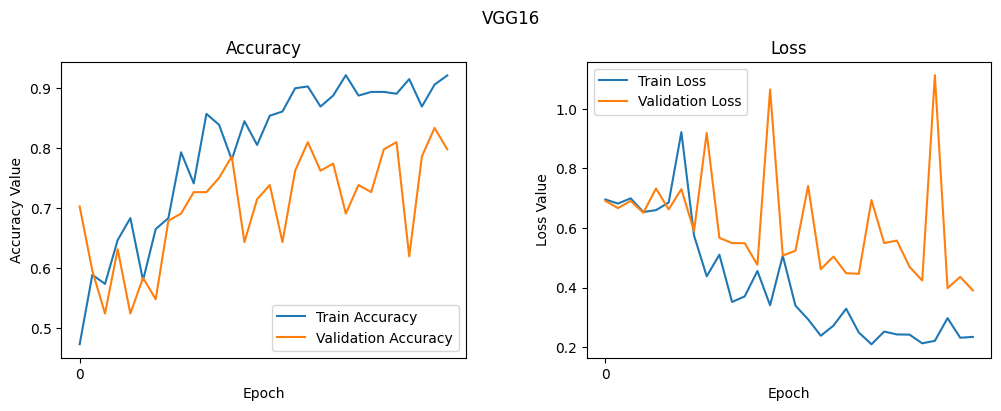

In [ ]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG16', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,30))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 3, 50))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 3, 50))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(val_generator, val_generator.n // val_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


In [ ]:
print(val_generator.classes)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


In [ ]:
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

Confusion Matrix
[[35  5]
 [10 34]]


In [ ]:
print('Classification Report')
target_names = ['No Tumor', 'Tumor']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       Tumor       0.78      0.88      0.82        40
    No Tumor       0.87      0.77      0.82        44

    accuracy                           0.82        84
   macro avg       0.82      0.82      0.82        84
weighted avg       0.83      0.82      0.82        84



Text(113.9222222222222, 0.5, 'True Values')

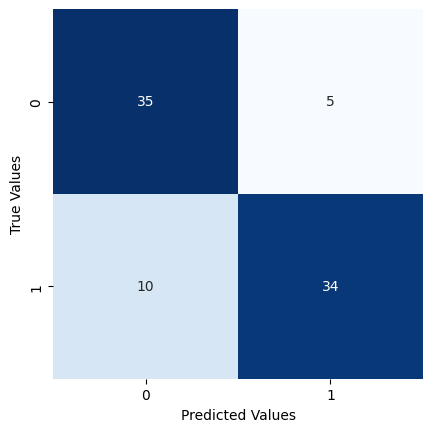

In [ ]:
import seaborn as sns
cm=confusion_matrix(val_generator.classes, y_pred)
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'No Tumor')]

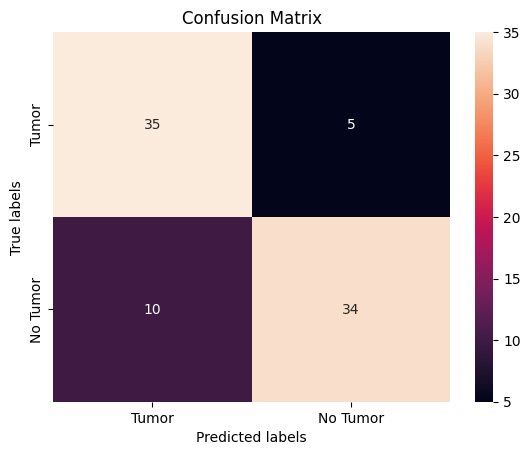

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Tumor', 'Tumor']); ax.yaxis.set_ticklabels(['Tumor', 'No Tumor'])

Confusion Matrix :
[[35  5]
 [10 34]]
Accuracy Score : 0.8214285714285714
Report : 
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        40
           1       0.87      0.77      0.82        44

    accuracy                           0.82        84
   macro avg       0.82      0.82      0.82        84
weighted avg       0.83      0.82      0.82        84



<Axes: >

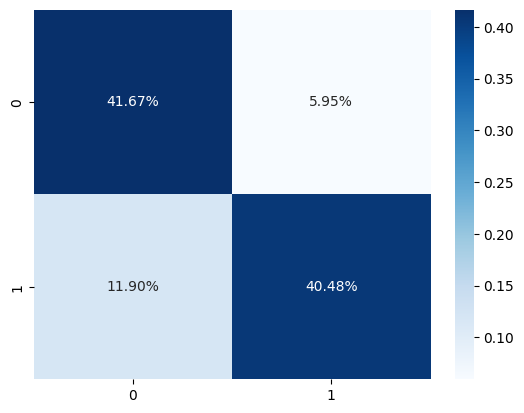

In [ ]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(val_generator.classes,y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(val_generator.classes,y_pred)) 
print('Report : ')
print(classification_report(val_generator.classes,y_pred))

sns.heatmap(results/np.sum(results), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(val_generator.classes, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.8238636363636364

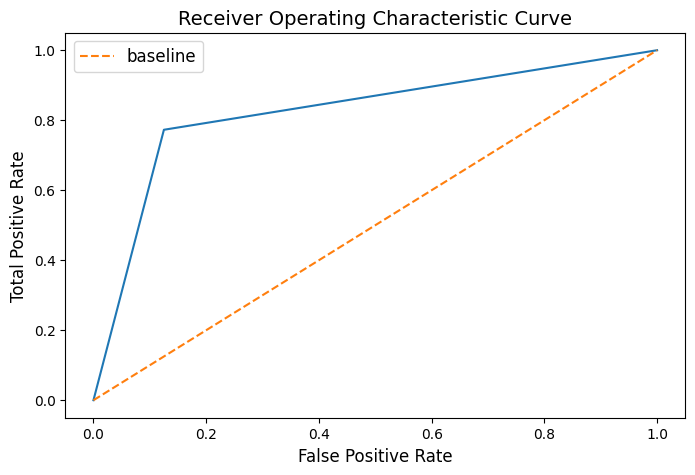

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);

In [ ]:
model.save('Vgg16Detection.h5')

In [ ]:
from keras.models import Model, load_model
model = load_model('Vgg16Detection.h5')

In [ ]:
import gradio as gr

In [ ]:
def load_labels(file_path):
    with open(file_path, 'r') as f:
        labels = f.read().splitlines()
    return labels

# Especifica la ruta del archivo labels.txt
labels_file = 'labels.txt'

# Carga las clases desde el archivo labels.txt
class_names = load_labels(labels_file)

# Verifica las clases cargadas
print(class_names)


['No Tumor', 'Tumor']


In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,224,224,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(2)}

In [ ]:
import cv2

def predict_image(img):
    # Verificar la forma actual del arreglo
    print("Forma actual del arreglo:", img.shape)

    # Redimensionar la imagen al tamaño requeridol
    img_resized = cv2.resize(img, (224, 224))

    # Verificar la nueva forma del arreglo redimensionado
    print("Nueva forma del arreglo redimensionado:", img_resized.shape)

    # Reajustar la forma del arreglo
    img_4d = img_resized.reshape(1, 224, 224, 3)

    # Realizar la predicción
    prediction = model.predict(img_4d)[0]

    # Devolver el resultado
    return {class_names[i]: float(prediction[i]) for i in range(4)}

In [ ]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Forma actual del arreglo: (224, 224, 3)
Nueva forma del arreglo redimensionado: (224, 224, 3)
1/1 [==============================] - 1s 540ms/step


Traceback (most recent call last):
  File "c:\Users\eliza\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\routes.py", line 414, in run_predict
    output = await app.get_blocks().process_api(
  File "c:\Users\eliza\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\blocks.py", line 1323, in process_api
    result = await self.call_function(
  File "c:\Users\eliza\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\blocks.py", line 1051, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "c:\Users\eliza\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "c:\Users\eliza\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\_backends\_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "c:\Users\eliza\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\_backe

Keyboard interruption in main thread... closing server.
